In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv('iris.csv')

In [4]:
df.iloc[:,1:]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df['Species'] =LabelEncoder().fit_transform(df['Species'])



In [6]:
df=df[df['Species'] !=0] [['SepalWidthCm','PetalLengthCm','Species']]

In [7]:
df.shape

(100, 3)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

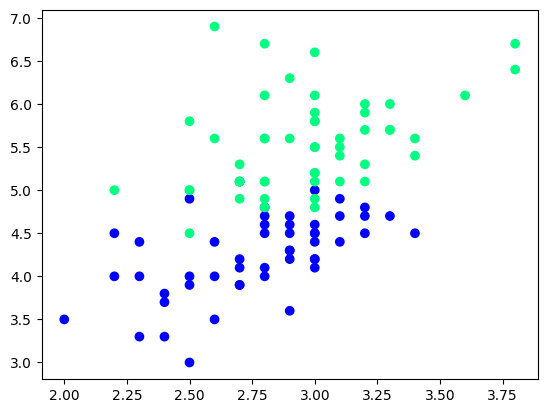

In [9]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'], cmap='winter')

In [10]:
df_train = df.iloc[:60,:].sample(10)

In [11]:
#taking only 10 rows for traning
df=df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val=df.iloc[60:80,:].sample(5)
df_test=df.iloc[80:,:].sample(5)

In [12]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1]

In [13]:
#Case 1 Bagging
#Data for tree 1
df_bag=df_train.sample(8, replace=True)

X = df_bag.iloc[:,0:2]
y= df_bag.iloc[:,-1]

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [15]:

dt_bag1= DecisionTreeClassifier()

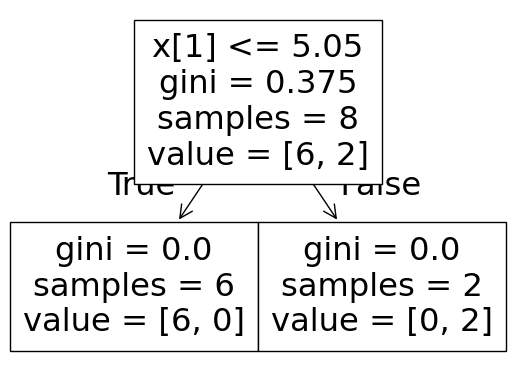

C:\Users\Dell\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


C:\Users\Dell\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


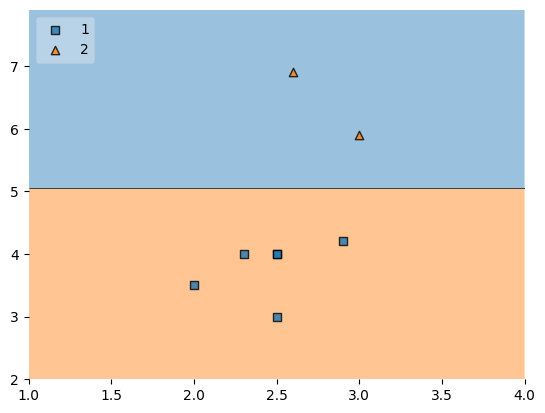

In [20]:
evaluate(dt_bag1, X,y)

In [19]:
#Data for tree 2
df_bag=df_train.sample(8, replace=True)

X = df_bag.iloc[:,0:2]
y= df_bag.iloc[:,-1]
df_bag

,SepalWidthCm,PetalLengthCm,Species
118,2.6,6.9,2
98,2.5,3.0,1
89,2.5,4.0,1
53,2.3,4.0,1
102,3.0,5.9,2
96,2.9,4.2,1
60,2.0,3.5,1
89,2.5,4.0,1


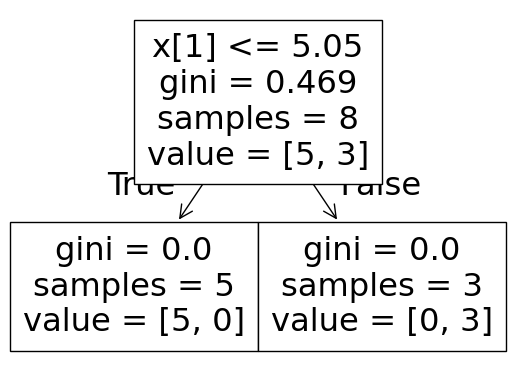

C:\Users\Dell\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


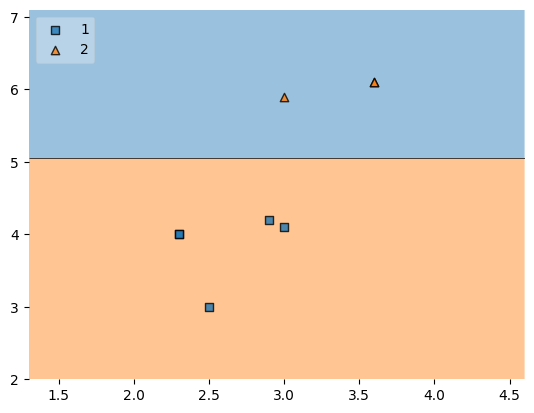

In [22]:

dt_bag2= DecisionTreeClassifier()
evaluate(dt_bag2, X,y)

In [21]:
#Data for tree 3
df_bag=df_train.sample(8, replace=True)

X = df_bag.iloc[:,0:2]
y= df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
109,3.6,6.1,2
98,2.5,3.0,1
88,3.0,4.1,1
53,2.3,4.0,1
102,3.0,5.9,2
109,3.6,6.1,2
96,2.9,4.2,1
53,2.3,4.0,1


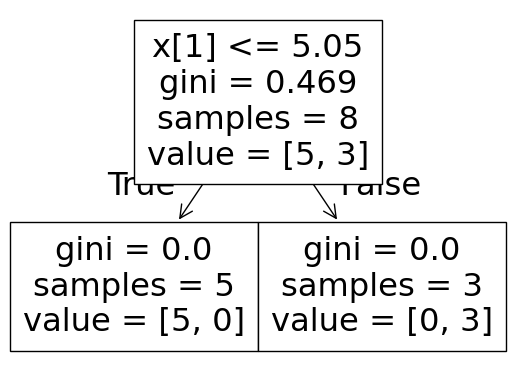

C:\Users\Dell\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


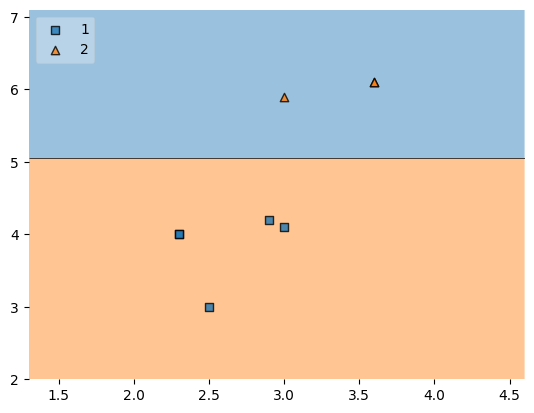

In [23]:
dt_bag3= DecisionTreeClassifier()
evaluate(dt_bag3, X,y)

In [17]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred= clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

In [24]:
df_test

,SepalWidthCm,PetalLengthCm,Species
81,2.4,3.7,1
95,3.0,4.2,1
93,2.3,3.3,1
131,3.8,6.4,2
116,3.0,5.5,2


In [26]:
#predcit
print("pred 1",dt_bag1.predict(np.array([3.8,6.4]).reshape(1,2)))
print("pred 1",dt_bag1.predict(np.array([3.8,6.4]).reshape(1,2)))
print("pred 1",dt_bag1.predict(np.array([3.8,6.4]).reshape(1,2)))

pred 1 [2]
pred 1 [2]
pred 1 [2]


C:\Users\Dell\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
